Abhängigkeiten installieren und Packages laden

In [ ]:
!pip install pandas
!pip install numpy

import pandas as pd
import numpy as np

# wenn es nicht läuft runtime neu starten

Subsets zusammenführen, Dopplungen entfernen

In [ ]:
csv_data_raw = [r'/content/4_1_ergebnisse.csv', r'/content/4_2_ergebnisse.csv', r'/content/4_3_ergebnisse.csv', r'/content/4_4_ergebnisse.csv']

csv_pfad = '/content/05_csv_data_raw.csv' # nicht wundern, hatte datei zwischenzeitlich umbenannt

csv_no_doubles_pfad = '/content/06_data_raw_no_doubles.csv'

df = pd.concat((pd.read_csv(f) for f in csv_data_raw), ignore_index=True)

df.to_csv('csv_data_raw.csv', index=False)

def entferne_doppelte_rezensionen(csv_pfad, anzahl_rezensionen=5):
    df = pd.read_csv(csv_pfad)

    # Doppelte Rezensionen basierend auf place_id und rezension entfernen
    df = df.drop_duplicates(subset=['place_id', 'rezension'], keep='first')

    # Anzahl der Rezensionen pro Ort begrenzen
    df = df.groupby('place_id').head(anzahl_rezensionen).reset_index(drop=True)

    return df

# Funktionsaufruf
ergebnis_df = entferne_doppelte_rezensionen(csv_pfad)

# Das bereinigte DataFrame anzeigen (optional)
print(ergebnis_df)

# Das bereinigte DataFrame in eine neue CSV-Datei speichern (optional)
ergebnis_df.to_csv("06_data_raw_no_doubles.csv", index=False)

\#2 (Freitag, 28/03) - erweitertes Datenset, doubles entfernen

In [ ]:
csv_pfad = '/content/09_data_covariates_avg.csv' # nicht wundern, hatte datei zwischenzeitlich umbenannt

csv_no_doubles_pfad = '/content/10_data_covs_avg_no_doubles.csv'

def entferne_doppelte_rezensionen(csv_pfad, anzahl_rezensionen=5):
    df = pd.read_csv(csv_pfad)

    # Doppelte Rezensionen basierend auf place_id und rezension entfernen
    df = df.drop_duplicates(subset=['place_id', 'rezension'], keep='first')

    # Anzahl der Rezensionen pro Ort begrenzen
    df = df.groupby('place_id').head(anzahl_rezensionen).reset_index(drop=True)

    return df

# Funktionsaufruf
ergebnis_df = entferne_doppelte_rezensionen(csv_pfad)

# Das bereinigte DataFrame anzeigen (optional)
print(ergebnis_df)

# Das bereinigte DataFrame in eine neue CSV-Datei speichern (optional)
ergebnis_df.to_csv("10_data_covs_avg_no_doubles.csv", index=False)

                                                     ort  \
0      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
1      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
2      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
3      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
4      DIAKO Krankenhaus gGmbH, Knuthstraße 1, Flensburg   
...                                                  ...   
11777  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11778  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11779  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11780  Klinikum Altenburger Land GmbH, Am Waldessaum ...   
11781  Klinikum Altenburger Land GmbH, Am Waldessaum ...   

                               name_x        strasze hausnr      stadt  \
0             DIAKO Krankenhaus gGmbH    Knuthstraße      1  Flensburg   
1             DIAKO Krankenhaus gGmbH    Knuthstraße      1  Flensburg   
2             DIAKO Krankenhaus gGmbH    Knuthstraße     

Rezensionen durchschnittliche Länge

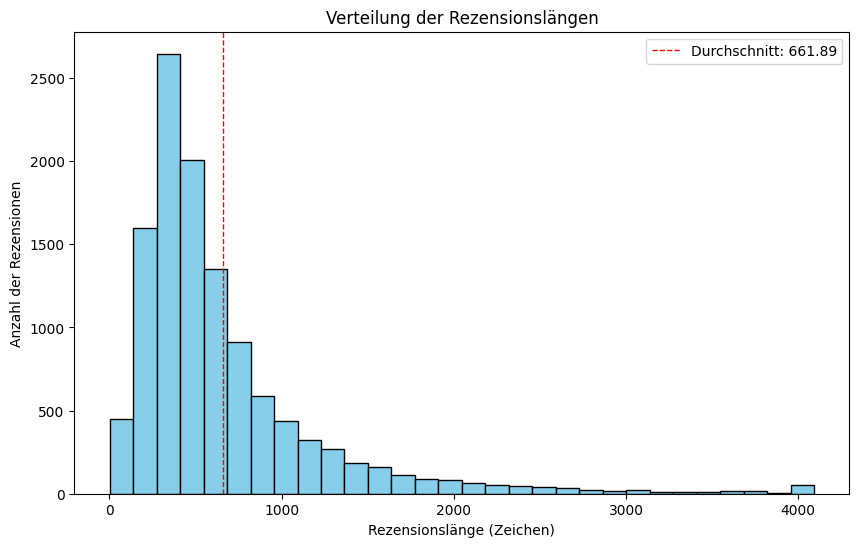

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
df = pd.read_csv("10_data_covs_avg_no_doubles.csv")

# Berechne die Länge jeder Rezension
df['rezension_laenge'] = df['rezension'].str.len()

# Berechne die durchschnittliche Rezensionslänge
durchschnittliche_laenge = df['rezension_laenge'].mean()
print(f"Die durchschnittliche Rezensionslänge beträgt: {durchschnittliche_laenge:.2f} Zeichen")

# Visualisierung (Histogramm der Rezensionslängen)
plt.figure(figsize=(10, 6))
plt.hist(df['rezension_laenge'], bins=30, color='skyblue', edgecolor='black')
plt.title('Verteilung der Rezensionslängen')
plt.xlabel('Rezensionslänge (Zeichen)')
plt.ylabel('Anzahl der Rezensionen')
plt.axvline(durchschnittliche_laenge, color='red', linestyle='dashed', linewidth=1, label=f'Durchschnitt: {durchschnittliche_laenge:.2f}')
plt.legend()
plt.show()

Validierung der automatischen Abrufe: Zufallsstichprobe & manueller Abgleich

In [ ]:
df = pd.read_csv(csv_no_doubles_pfad) #siehe oben

def zufallsstichprobe(csv_pfad, stichprobengroesse=100, zufalls_seed=42): #seed 42
    df = pd.read_csv(csv_no_doubles_pfad)

    # Zufallsstichprobe ziehen
    stichprobe_df = df.sample(n=min(stichprobengroesse, len(df)), random_state=zufalls_seed)

    return stichprobe_df

# Beispielaufruf:
csv_datei = csv_no_doubles_pfad # Ersetzen Sie dies durch den tatsächlichen Dateinamen
stichprobe = zufallsstichprobe(csv_datei, stichprobengroesse=100, zufalls_seed=42)

# Die Stichprobe in eine neue CSV-Datei speichern (optional):
stichprobe.to_csv("07_stichprobe_validierung.csv", index=False)

# Validierung manuell durchgeführt, für Kriterien siehe Hausarbeit;
# Kodierung: 1 = valid; 0 = not valid or valid with restrictions;


########## hier noch die Ergebnisse ausrechnen ###############

                                                     ort  \
2507   Alexius/Josef Krankenhaus, Montanusstraße 54, ...   
11482  Sophien- und Hufeland-Klinikum gGmbH, Henry-va...   
4207   Ev. Krankenhaus Lippstadt, Wiedenbrücker Straß...   
1935   Rotes-Kreuz-Krankenhaus Bremen gGmbH, St.-Paul...   
7768   Klinik Dr. Wilhelm, Hans-Urmiller-Ring 46, Wol...   
...                                                  ...   
10769  Hauptstandort Rudolf-Virchow-Klinikum, Virchow...   
10563  Sana HANSE-Klinikum Wismar GmbH, Dr.-Unruh-Str...   
8830   Bezirksklinikum Ansbach, Paracelsusstraße 36, ...   
5006   Helios Kliniken Kassel, Hansteinstraße 29, Kassel   
4216       LWL-Klinik Lippstadt, Im Hofholz 6, Lippstadt   

                                        name                    strasze  \
2507               Alexius/Josef Krankenhaus             Montanusstraße   
11482   Sophien- und Hufeland-Klinikum gGmbH  Henry-van-de-Velde-Straße   
4207               Ev. Krankenhaus Lippstadt       Wie

Neues File mit weiteren Covariaten aus dem KHV

In [ ]:
# Lade die Krankenhausdaten aus der Excel-Datei
khv_df = pd.read_excel('/content/2023_khv.xlsx', sheet_name='Tabelle1')

# Lade die Google-Maps-Rezensionen aus der CSV-Datei
reviews_df = pd.read_csv('/content/06_data_raw_no_doubles.csv')

# Bereinige die Spaltennamen in beiden DataFrames
khv_df.columns = khv_df.columns.str.strip()
reviews_df.columns = reviews_df.columns.str.strip()

#print(khv_df.head())
#print(reviews_df.head())
#
#name = str('Adresse_Name')
#strasze = str('Adresse_Strasse_Standort')
#hausnr = str('Adresse_Haus-Nr._Standort')
#stadt = str('Adresse_Ort_Standort')
#ort = f"{name}, {strasze} {hausnr}, {stadt}"

# Führe die Daten basierend auf dem exakten Krankenhausnamen zusammen
merged_df = pd.merge(reviews_df, khv_df, left_on='name', right_on='Adresse_Name', how='left')

# Wähle die relevanten Spalten aus, die wir behalten möchten
columns_to_keep = [
    'ort', 'name', 'strasze', 'hausnr', 'stadt', 'bundesland', 'place_id', 'bewertung', 'rezension', 'zeit',
    'Traeger', 'T_Name', 'EinrichtungsTyp', 'Allgemeine_Notfallversorgung',
    'Spezielle_Notfallversorgung_Schwerverletzte', 'Spezielle_Notfallversorgung_Kinder',
    'Spezielle_Notfallversorgung_Spezial', 'Spezielle_Notfallversorgung_Schlaganfall',
    'Spezielle_Notfallversorgung_Durchblutung_Herz', 'INSG'
]

# Erstelle das finale DataFrame mit den ausgewählten Spalten
final_df = merged_df[columns_to_keep]

# Speichere das finale DataFrame in eine neue CSV-Datei
final_df.to_csv('08_data_and_covariates.csv', index=False, encoding='utf-8-sig')

print("Die Daten wurden erfolgreich zusammengeführt und in 'merged_krankenhaus_reviews.csv' gespeichert.")

Die Daten wurden erfolgreich zusammengeführt und in 'merged_krankenhaus_reviews.csv' gespeichert.
